In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/stud.csv')

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [3]:
data.shape

(1000, 8)

#### Checking data type

In [4]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### Listing Cathegorical features

In [5]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
for i in range(len(data.columns)):
    if data[data.columns[i]].dtypes=='O':
        print(data.columns[i])
        print(data[data.columns[i]].unique())
        print('----------------------------------')

gender
['female' 'male']
----------------------------------
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
----------------------------------
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
----------------------------------
lunch
['standard' 'free/reduced']
----------------------------------
test_preparation_course
['none' 'completed']
----------------------------------


### Data Preprocessing

In [7]:
#Checking missing values inside data
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#Checking if there are any duplicates
data.duplicated().sum()

0

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Descriptive Statistics

In [10]:
#How many students scored full in all the three subjects
math = data[data['math_score']==100]['gender'].count()
reading = data[data['reading_score']==100]['gender'].count()
writing = data[data['writing_score']==100]['gender'].count()

print(f'There are {math} students who scored full in maths')
print(f'There are {reading} students who scored full in reading')
print(f'There are {writing} students who scored full in writing')

There are 7 students who scored full in maths
There are 17 students who scored full in reading
There are 14 students who scored full in writing


In [11]:
#How many students scored full in all the three subjects
math = data[data['math_score']<25]['gender'].count()
reading = data[data['reading_score']<25]['gender'].count()
writing = data[data['writing_score']<25]['gender'].count()


print(f'There are {math} students who got fail in maths')
print(f'There are {reading} students who got fail in reading')
print(f'There are {writing} students who got fail in writing')

There are 7 students who got fail in maths
There are 4 students who got fail in reading
There are 5 students who got fail in writing


In [12]:
#lets create a new column of average marks obtained for all 3 subjects

data['average'] = (data['math_score'] + data['reading_score'] + data['writing_score'])/3

In [13]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


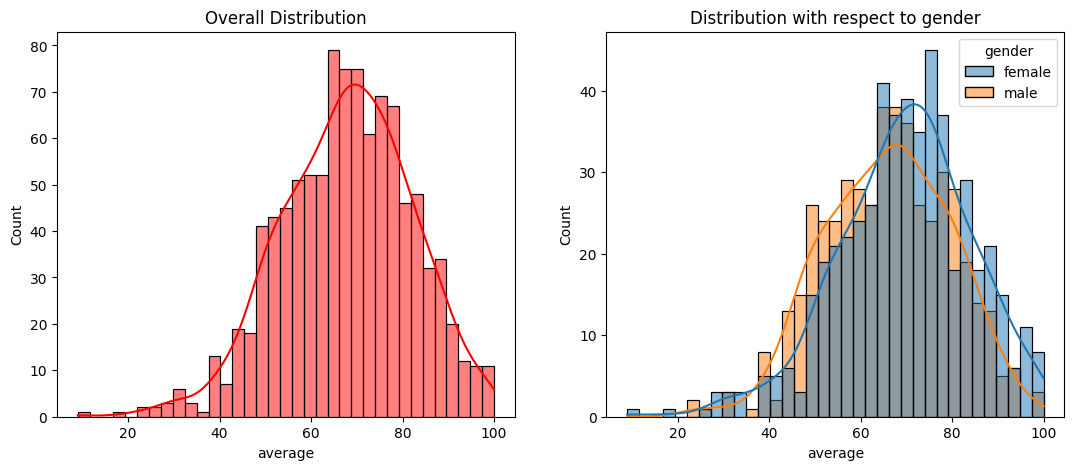

Bad pipe message: %s [b'\x93\xc2\xc12\x15\x9bc c\xb3;!\xdeT\xd3}\x18\x12 \x85,A\x85+\xcfF\x86eL\xaf\xae\xdf1\xd0\xa8|C\x90\xbfbY\x02\x07\x86\xe4\xbd\xaa\xdfl\x0e\x8d\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00']
Bad pipe message: %s [b"G\xf7lH\xc3\x01\x8b%9\xfd\xf4\xffK\xde\x93\xb1\xb5\xb6\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0."]
Bad pipe message: %s [b'\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08']
Bad pipe message: %s

In [21]:
fig,axs = plt.subplots(1,2,figsize=(13,5))

plt.subplot(121)
sns.histplot(data=data,x='average',bins=35,kde=True,color='r')
plt.title('Overall Distribution')

plt.subplot(122)
sns.histplot(data=data,x='average',bins=35,kde=True,hue='gender')
plt.title('Distribution with respect to gender')

plt.show()

In [15]:
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


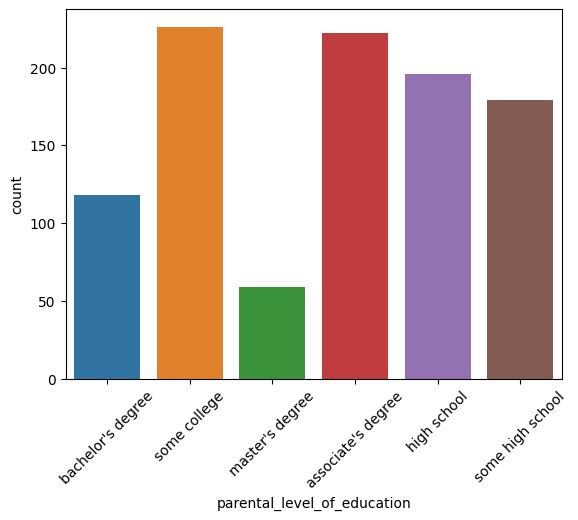

In [16]:
sns.countplot(x=data['parental_level_of_education'])
plt.xticks(rotation=45);

In [17]:
pd.pivot_table(data,values='math_score',index='gender',columns='race_ethnicity', aggfunc=['mean'])

mean                                            
race_ethnicity    group A    group B    group C    group D    group E
gender                                                               
female          58.527778  61.403846  62.033333  65.248062  70.811594
male            63.735849  65.930233  67.611511  69.413534  76.746479